In [1]:
import sys
sys.path.append("../")

In [32]:
import cv2
import kornia as korn
import numpy as np
from PIL import Image

import torch
import torchvision.transforms as T
from torchvision.utils import make_grid

from common.ale import ALE

In [34]:
cv2.INTER_

Docstring:
resize(src, dsize[, dst[, fx[, fy[, interpolation]]]]) -> dst
.   @brief Resizes an image.
.   
.   The function resize resizes the image src down to or up to the specified size. Note that the
.   initial dst type or size are not taken into account. Instead, the size and type are derived from
.   the `src`,`dsize`,`fx`, and `fy`. If you want to resize src so that it fits the pre-created dst,
.   you may call the function as follows:
.   @code
.       // explicitly specify dsize=dst.size(); fx and fy will be computed from that.
.       resize(src, dst, dst.size(), 0, 0, interpolation);
.   @endcode
.   If you want to decimate the image by factor of 2 in each direction, you can call the function this
.   way:
.   @code
.       // specify fx and fy and let the function compute the destination image size.
.       resize(src, dst, Size(), 0.5, 0.5, interpolation);
.   @endcode
.   To shrink an image, it will generally look best with #INTER_AREA interpolation, whereas to
.   enlar

In [68]:
def th2pil(t):
    t = t.squeeze()
    t = t.permute(1, 2, 0) if t.ndim == 3 else t
    np_im = t.numpy().astype(np.uint8)
    np_im = cv2.resize(np_im, None, fx = 2, fy = 2, interpolation=cv2.INTER_NEAREST)
    return Image.fromarray(np_im)

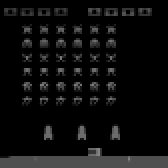

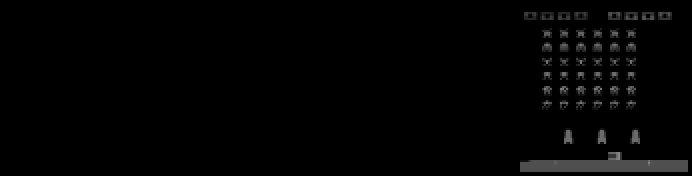

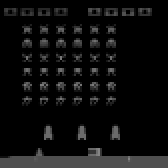

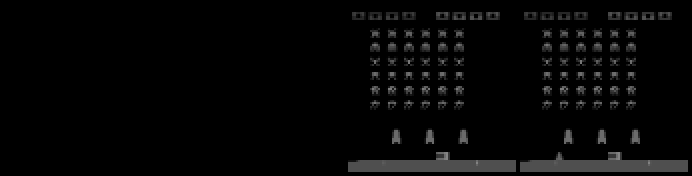

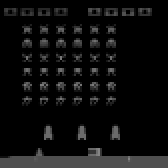

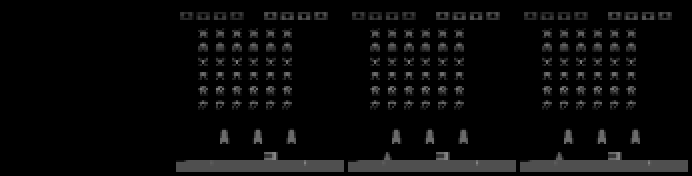

In [87]:
game = "SpaceInvaders"
env1 = ALE(game, 42, "cpu", obs_dims=(84,84), obs_mode="L")
env4 = ALE(game, 42, "cpu", obs_dims=(84,84), obs_mode="L", history_length=4)

o1 = env1.reset()
o4 = env4.reset()

for _ in range(3):
        
    display(th2pil(o1))
    display(th2pil(make_grid(o4.squeeze(0))))
    
    a = int(np.random.choice(list(env.actions.keys())))
    o1, _, d, _ = env1.step(a)
    o4, _, d, _ = env4.step(a)

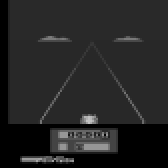